In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [4]:
df = pd.read_csv(r'cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

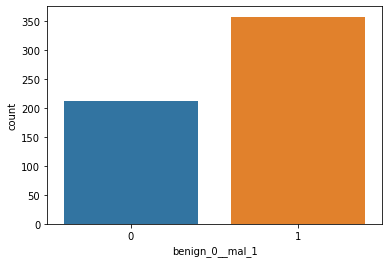

In [9]:
sns.countplot(x='benign_0__mal_1', data=df)

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [12]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

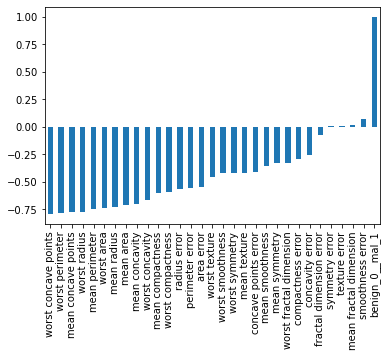

In [13]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

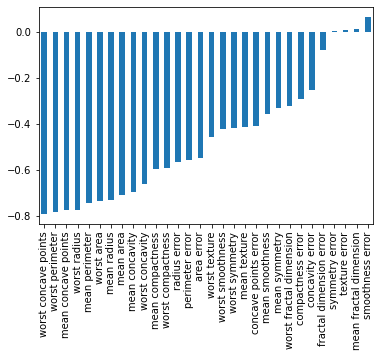

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

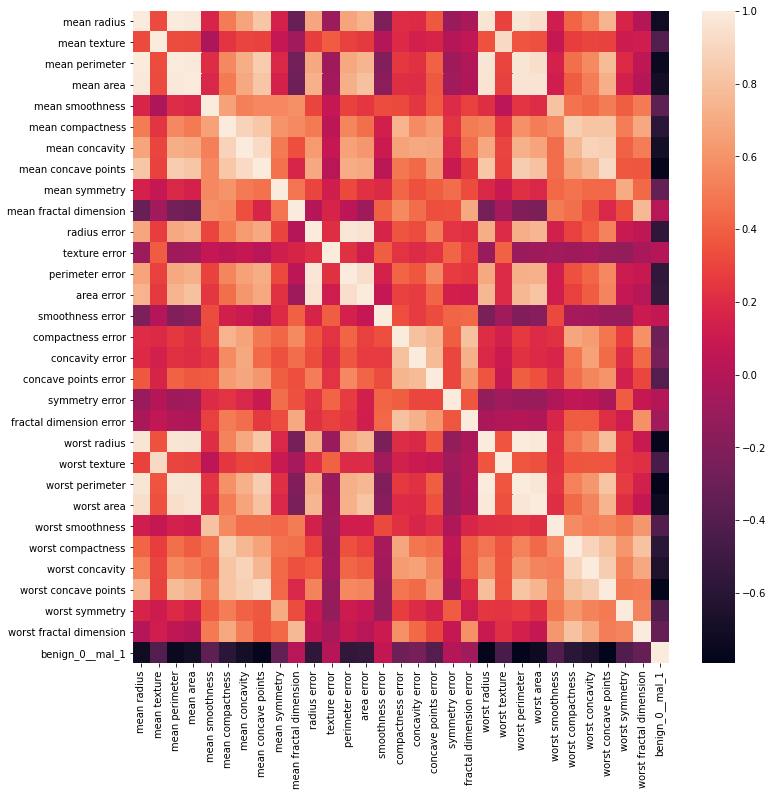

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=None)

In [23]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [33]:
from tensorflow.keras.layers import Dense, Dropoutout
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 34ms/step - loss: 0.6573 - val_loss: 0.6262
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6139 - val_loss: 0.5818
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5739 - val_loss: 0.5372
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5347 - val_loss: 0.4917
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4925 - val_loss: 0.4451
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4507 - val_loss: 0.3994
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4102 - val_loss: 0.3610
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3737 - val_loss: 0.3213
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3409 - val_loss: 0.2877
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3105 - val_loss: 0.2577
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0540 - val_loss: 0.0567
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.0485
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0610
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0671
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0482
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.0594
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0474
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.0483
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.0670
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 0.0516
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.0511
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0560
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0745
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.0767
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.0522
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.0568
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.0519
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.0561
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.0619
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.0868
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.0697
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0865
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.0901
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0635
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.0604
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.0640
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.0621
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.0635
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.0605
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0686
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0740
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.0718
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 0.1054
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0784
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0831
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0906
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.0762
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0732
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0843
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.0799
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0908
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0930
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.1819
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0914
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.1210
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0951
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.1071
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.1211
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0959
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.1138
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.1215
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.1110
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.1218
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.1151
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.1421
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.1394
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.1326
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.1131
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.1448
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.1450
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.1809
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.2404
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.1581
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.1294
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.1481
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.1380
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.1319
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.1397
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.1559
Epoch 578/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0025 - val_loss: 0.1301
Epoc

In [38]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

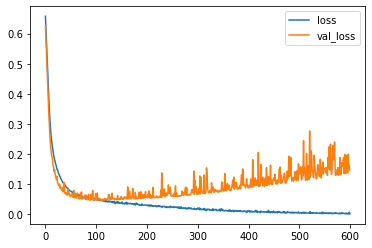

In [39]:
losses.plot()  ##overfitted model

we want to avoid overfitting so we will use early stopping or dropout tecxhnique top avoid model overfitting.

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6866 - val_loss: 0.6544
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6414 - val_loss: 0.5992
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.5510
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5525 - val_loss: 0.5108
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5134 - val_loss: 0.4671
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4730 - val_loss: 0.4187
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4332 - val_loss: 0.3771
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3976 - val_loss: 0.3451
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3660 - val_loss: 0.3074
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3353 - val_loss: 0.2770
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0617 - val_loss: 0.0494
Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0484
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0632 - val_loss: 0.0483
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0615 - val_loss: 0.0473
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0606 - val_loss: 0.0469
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0595 - val_loss: 0.0489
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0558 - val_loss: 0.0477
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0576 - val_loss: 0.0792
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0595 - val_loss: 0.0464
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0609 - val_loss: 0.0488
Epoch 92/600


In [46]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

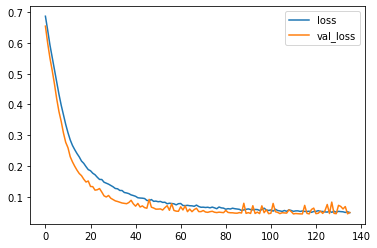

In [47]:
losses.plot()

1. https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


2. https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
3. https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

In [51]:
### using dropout avaoid overfiiting
from tensorflow.keras.layers import Dropout

In [53]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [55]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 28ms/step - loss: 0.6675 - val_loss: 0.6384
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6485 - val_loss: 0.6076
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6179 - val_loss: 0.5803
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5887 - val_loss: 0.5494
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5646 - val_loss: 0.5182
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5390 - val_loss: 0.4836
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5114 - val_loss: 0.4553
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4971 - val_loss: 0.4292
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4717 - val_loss: 0.3999
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4435 - val_loss: 0.3717
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0915 - val_loss: 0.0586
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0772 - val_loss: 0.0632
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0852 - val_loss: 0.0549
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0974 - val_loss: 0.0550
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1033 - val_loss: 0.0610
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 0.0596
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 0.0539
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0896 - val_loss: 0.0710
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0883 - val_loss: 0.0538
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0780 - val_loss: 0.0652


In [56]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

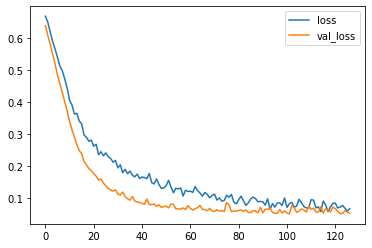

In [57]:
losses.plot()

In [59]:
y_predict = model.predict_classes(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [64]:
print(confusion_matrix(y_test, y_predict))

[[53  1]
 [ 1 88]]
